In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Xử lý Dữ liệu**

In [2]:
#Read the first 2 rows of the data to retrieve the column names
df = pd.read_csv('Preprocessing_data/data.csv', header=[0,1])
df.columns

MultiIndex([(               'Year', 'Countries, territories and areas'),
            (              ' 2019',                      ' Both sexes'),
            (              ' 2019',                            ' Male'),
            (              ' 2019',                          ' Female'),
            (              ' 2018',                      ' Both sexes'),
            (              ' 2018',                            ' Male'),
            (              ' 2018',                          ' Female'),
            (              ' 2017',                      ' Both sexes'),
            (              ' 2017',                            ' Male'),
            (              ' 2017',                          ' Female'),
            (              ' 2016',                      ' Both sexes'),
            (              ' 2016',                            ' Male'),
            (              ' 2016',                          ' Female'),
            (              ' 2015',                

In [3]:
#Processing and column name by deleting white space and renaming the column name
df.columns = pd.MultiIndex.from_tuples(
    [(col[0] if "Unnamed" not in col[0] else "continent_list", col[1]) for col in df.columns]
)
df.columns = pd.MultiIndex.from_tuples(
    [(col[0].strip(), col[1].strip()) for col in df.columns]
)
#Sort all countries by their continent
df_sorted = df.sort_values(by=[("continent_list", "Continent")], ascending=True)
df_sorted

Year       2019                    2018        \
    Countries, territories and areas Both sexes  Male Female Both sexes  Male   
182                         Zimbabwe       41.2  67.9   16.9       40.6  66.8   
144                       Seychelles       11.3  17.6    4.5       11.4  17.8   
32          Central African Republic       37.7  52.0   23.7       36.0  49.5   
33                              Chad       32.4  43.3   21.6       30.6  40.8   
142                          Senegal       23.5  34.6   13.0       23.7  34.7   
..                               ...        ...   ...    ...        ...   ...   
34                             Chile       14.9  23.6    6.5       14.0  21.8   
49                           Ecuador       20.1  31.2    9.0       20.7  32.2   
22                            Brazil       16.0  26.9    5.6       17.1  28.9   
175                          Uruguay       14.8  23.6    6.5       15.8  25.4   
70                            Guyana       22.3  38.9    5.6       22.5  39.3   

                 2017               ...       2002                    2001  \
    Female Both sexes  Male Female  ... Both sexes  Male Female Both sexes   
182   16.8       40.1  65.7   16.7  ...       32.4  57.5    8.6       29.7   
144    4.6       11.4  17.9    4.6  ...       19.0  30.8    7.4       12.1   
32    22.7       35.3  48.4   22.5  ...       31.6  41.6   21.9       31.9   
33    20.5       28.9  38.4   19.4  ...       26.4  35.0   18.0       26.6   
142   13.2       23.8  34.7   13.5  ...       24.7  34.3   15.4       24.6   
..     ...        ...   ...    ...  ...        ...   ...    ...        ...   
34     6.4       14.0  22.7    5.5  ...       16.0  26.7    5.6       16.2   
49     9.2       21.3  33.5    9.1  ...       15.0  22.9    7.1       14.8   
22     5.8       18.7  31.1    6.7  ...       21.2  34.7    8.0       20.1   
175    6.8       14.1  22.3    6.4  ...       12.3  19.3    5.8       15.6   
70     5.7       22.7  39.6    5.7  ...       24.0  39.6    8.4       24.3   

                       2000              continent_list  
     Male Female Both sexes  Male Female      Continent  
182  53.2    7.4       29.3  52.7    6.9         Africa  
144  19.6    4.7       13.6  22.0    5.2         Africa  
32   41.8   22.3       32.3  42.0   23.0         Africa  
33   35.2   18.0       27.0  35.7   18.3         Africa  
142  34.1   15.5       24.8  34.1   15.8         Africa  
..    ...    ...        ...   ...    ...            ...  
34   26.4    6.4       17.9  29.5    6.7  South America  
49   22.6    6.9       13.5  20.7    6.3  South America  
22   32.9    7.6       19.7  32.0    7.7  South America  
175  23.8    7.9       16.8  26.2    8.1  South America  
70   42.2    6.4       26.2  42.7    9.9  South America  

[183 rows x 62 columns]

In [4]:
both_sexes_cols = [(str(year).strip(), "Both sexes") for year in range(2000, 2020) if (str(year).strip(), "Both sexes") in df.columns]

# Group by continent and calculate it for each year
df_mean_continent = df_sorted.groupby(("continent_list", "Continent"))[both_sexes_cols].mean()

both_sexes_cols = [col for col in df_mean_continent.columns if col[1] == "Both sexes"]

In [5]:
df_mean_continent["mean_both_sexes"] = df_mean_continent[both_sexes_cols].mean(axis=1)

df_mean_continent

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean_both_sexes
,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,,
Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,26.722222,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,17.434043,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,10.120513,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205
North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,14.276190,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,12.230000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,19.950000,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250


In [6]:
df_both_sexes = df_mean_continent.reset_index()
df_both_sexes.columns = ["Continent" if col == ("continent_list", "Continent") else "mean_both_sexes" if col == ("mean_both_sexes", "") else col for col in df_both_sexes.columns]
df_both_sexes.sort_values(by="mean_both_sexes", ascending=False, inplace=True)
total_both_sexes = df_both_sexes[["Continent", "mean_both_sexes"]]
total_both_sexes

,Continent,mean_both_sexes
0,Africa,26.916296
5,South America,19.196250
1,Asia,16.902553
3,North America,14.960476
4,Oceania,11.358000
2,Europe,10.183205


In [7]:
df_both_sexes

,Continent,"(2000, Both sexes)","(2001, Both sexes)","(2002, Both sexes)","(2003, Both sexes)","(2004, Both sexes)","(2005, Both sexes)","(2006, Both sexes)","(2007, Both sexes)","(2008, Both sexes)",...,"(2011, Both sexes)","(2012, Both sexes)","(2013, Both sexes)","(2014, Both sexes)","(2015, Both sexes)","(2016, Both sexes)","(2017, Both sexes)","(2018, Both sexes)","(2019, Both sexes)",mean_both_sexes
0,Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
5,South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250
1,Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
3,North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
4,Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
2,Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205


## **Phân tích trên tất cả các châu lục**

### **Pie chart biểu thị tỉ lệ tủ vong do tai nạn giao thông giữa các châu lục (`Duyệt`)**

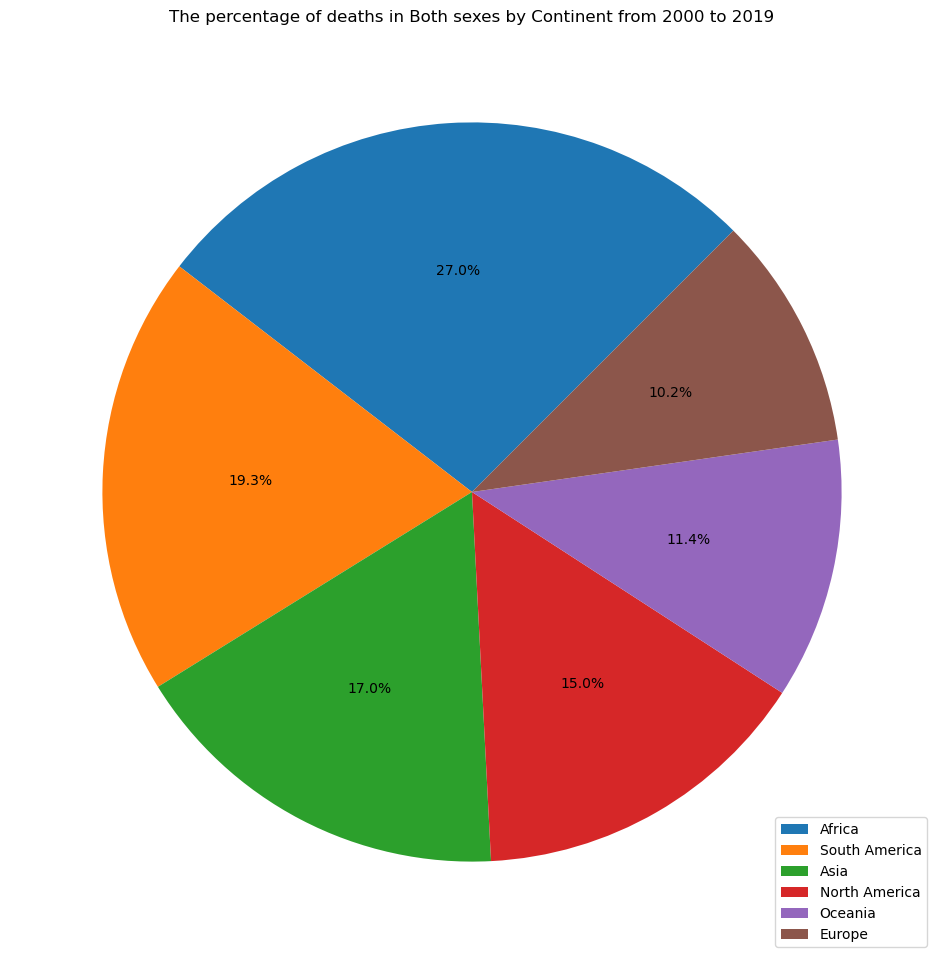

In [8]:
#draw pie chart
labels = df_both_sexes["Continent"]
sizes = df_both_sexes["mean_both_sexes"]
fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(sizes,autopct='%1.1f%%', startangle=45)  
plt.legend(labels, loc="lower right")
plt.title("The percentage of deaths in Both sexes by Continent from 2000 to 2019")  
plt.show()

### **Line chart so sánh trend tử vong giữa các châu lục trong giai đonaj 2000-2019 (`Duyệt`)**

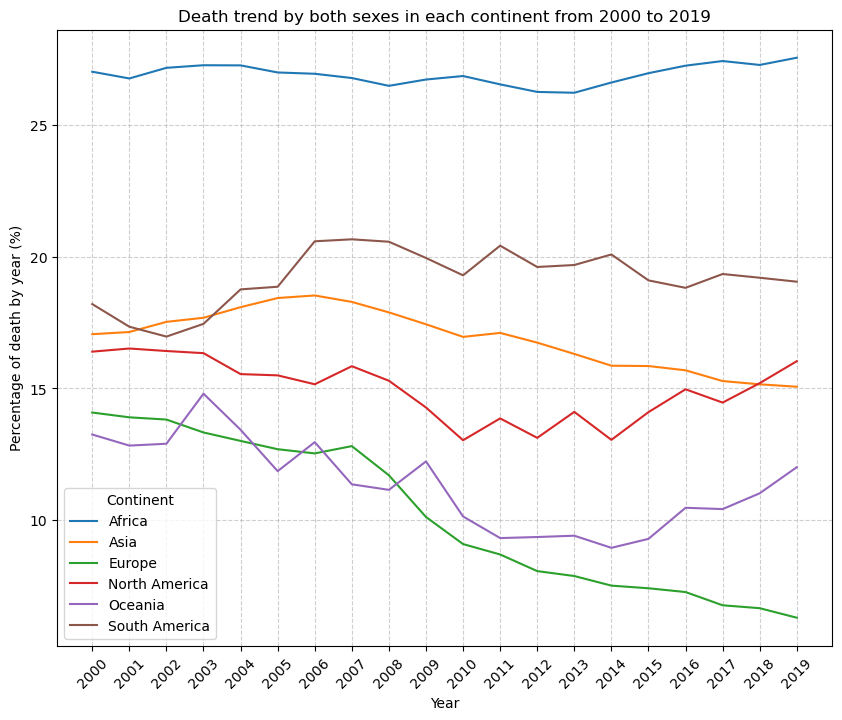

In [9]:
# draw a line chart displays the death trend in each continent from 2000 to 2019
years = [str(year) for year in range(2000, 2020)]    
deaths_year_cont_dict = {}

for continent in df_mean_continent.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict[continent] = [
        df_mean_continent.loc[continent, (year, "Both sexes")] if (year, "Both sexes") in df_mean_continent.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Percentage of death by year (%)")
plt.title("Death trend by both sexes in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()

### **Bar chart thể hiện tỷ lệ tử vong ở các giới tính do tai nạn giao thông giữa các châu lục (`Duyệt`)**

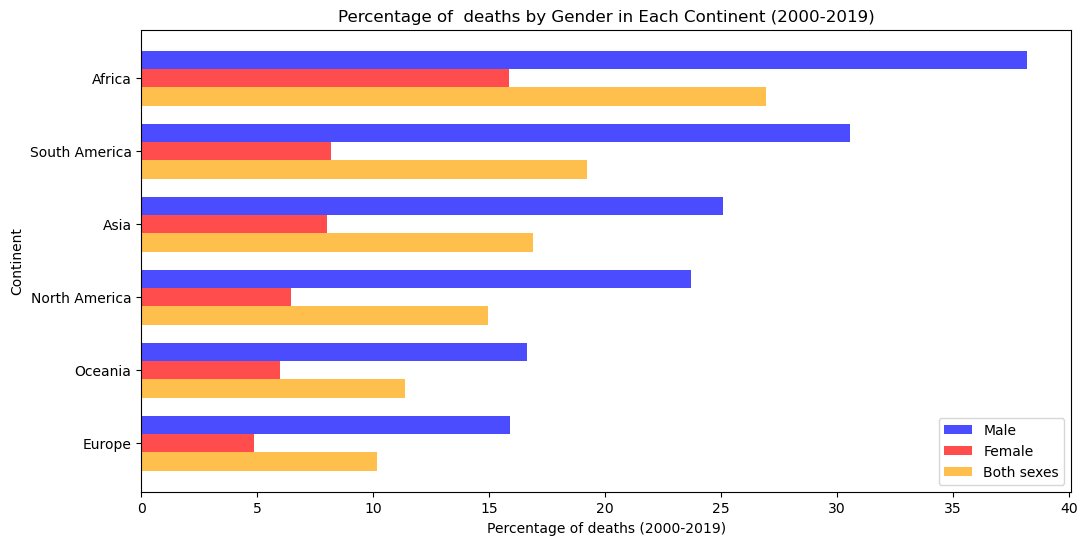

In [10]:
# Create lists of columns for "Male" and "Female" deaths from 2000 to 2019
male_cols = [(str(year).strip(), "Male") for year in range(2000, 2020) if (str(year).strip(), "Male") in df.columns]
female_cols = [(str(year).strip(), "Female") for year in range(2000, 2020) if (str(year).strip(), "Female") in df.columns]

# Group by continent and mean the total deaths for "Male" and "Female" each year
df_mean_continent_male = df_sorted.groupby(("continent_list", "Continent"))[male_cols].mean()
df_mean_continent_female = df_sorted.groupby(("continent_list", "Continent"))[female_cols].mean()

total_male_deaths = df_mean_continent_male.mean(axis=1)
total_female_deaths = df_mean_continent_female.mean(axis=1)

total_male_deaths.sort_values(ascending=False, inplace=True)
total_female_deaths.sort_values(ascending=False, inplace=True)  
total_both_sexes_values = total_both_sexes["mean_both_sexes"].values

# Extract continent names
continents = total_male_deaths.index
# Set up bar positions
y_indexes = np.arange(len(continents))
height = 0.25  # Width of each bar in horizontal bar chart

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(y_indexes - height, total_male_deaths, height=height, label="Male", color="blue", alpha=0.7)
plt.barh(y_indexes, total_female_deaths, height=height, label="Female", color="red", alpha=0.7)
plt.barh(y_indexes + height, total_both_sexes_values, height=height, label="Both sexes", color="orange", alpha=0.7)


# Customize the plot
plt.yticks(ticks=y_indexes, labels=continents)
plt.ylabel("Continent")
plt.xlabel("Percentage of deaths (2000-2019)")
plt.title("Percentage of  deaths by Gender in Each Continent (2000-2019)")
plt.legend()

# Invert y-axis to match descending order
plt.gca().invert_yaxis()

# Show the chart
plt.show()

### **Khúc dưới hên xui**

In [11]:
df_mean_continent_male

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,
Africa,37.938889,37.642593,38.279630,38.477778,38.479630,38.070370,38.046296,37.801852,37.396296,37.848148,38.114815,37.744444,37.372222,37.312963,37.942593,38.468519,38.983333,39.266667,39.057407,39.487037
Asia,25.036170,25.193617,25.689362,25.993617,26.585106,27.168085,27.278723,27.040426,26.634043,25.934043,25.172340,25.448936,24.942553,24.348936,23.670213,23.627660,23.378723,22.887234,22.725532,22.576596
Europe,21.892308,21.587179,21.551282,20.830769,20.351282,19.769231,19.625641,20.187179,18.538462,15.833333,14.194872,13.551282,12.641026,12.187179,11.730769,11.525641,11.315385,10.433333,10.305128,9.746154
North America,25.933333,26.095238,25.604762,25.823810,24.409524,24.133333,23.571429,24.928571,24.209524,22.842857,20.461905,21.871429,20.523810,22.414286,20.704762,22.614286,24.047619,23.276190,24.509524,25.928571
Oceania,19.200000,18.590000,18.810000,21.790000,19.950000,17.640000,19.420000,16.640000,16.290000,17.580000,14.870000,13.610000,13.750000,13.560000,12.970000,13.550000,15.340000,15.180000,16.110000,17.550000
South America,28.458333,27.275000,26.591667,27.350000,29.491667,29.541667,32.033333,32.616667,32.675000,31.875000,30.441667,32.591667,31.508333,31.700000,32.491667,30.858333,30.341667,31.208333,30.958333,30.683333


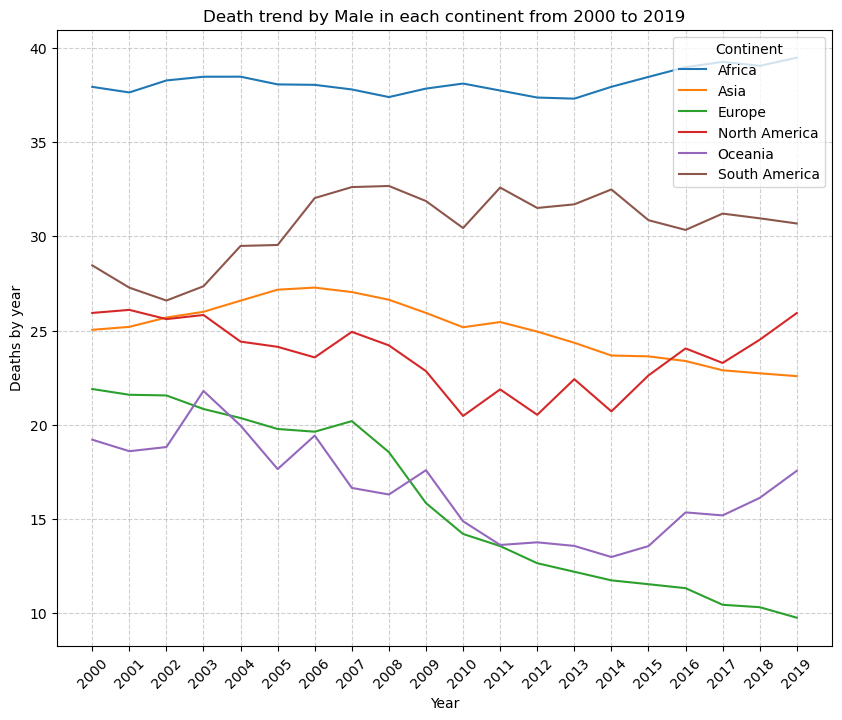

In [12]:
#draw line chart for male
years = [str(year) for year in range(2000, 2020)]
deaths_year_cont_dict_male = {}

for continent in df_mean_continent_male.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict_male[continent] = [
        df_mean_continent_male.loc[continent, (year, "Male")] if (year, "Male") in df_mean_continent_male.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Deaths by year")
plt.title("Death trend by Male in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict_male.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()

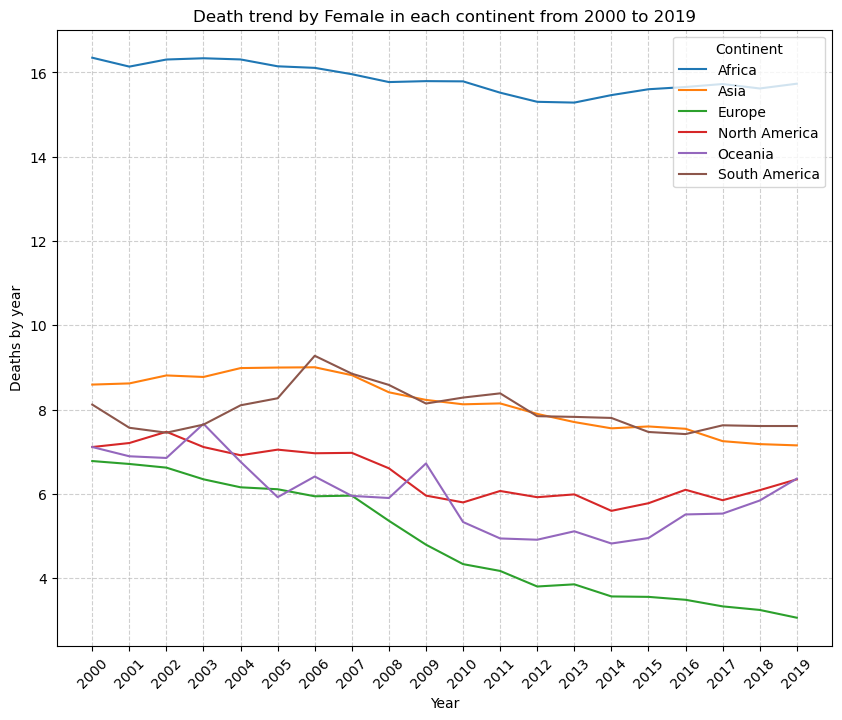

In [13]:
#draw line chart for female
years = [str(year) for year in range(2000, 2020)]
deaths_year_cont_dict_female= {}

for continent in df_mean_continent_female.index:  # Lặp qua từng châu lục
    deaths_year_cont_dict_female[continent] = [
        df_mean_continent_female.loc[continent, (year, "Female")] if (year, "Female") in df_mean_continent_female.columns else None
        for year in years
    ]
plt.figure(figsize=(10,8))
plt.xlabel("Year")
plt.ylabel("Deaths by year")
plt.title("Death trend by Female in each continent from 2000 to 2019")
for continent, deaths in deaths_year_cont_dict_female.items():
    plt.plot(years, deaths, label=continent)

plt.legend(title="Continent", loc="upper right")  # Thêm chú thích
plt.xticks(rotation=45)  # Xoay trục x cho dễ đọc
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới nhẹ
plt.show()

In [14]:
df_mean_continent

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean_both_sexes
,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,
"(continent_list, Continent)",,,,,,,,,,,,,,,,,,,,,
Africa,27.018519,26.762963,27.166667,27.264815,27.259259,26.990741,26.940741,26.779630,26.483333,26.722222,...,26.538889,26.251852,26.220370,26.609259,26.962963,27.248148,27.424074,27.275926,27.550000,26.916296
Asia,17.057447,17.140426,17.525532,17.680851,18.082979,18.429787,18.527660,18.282979,17.885106,17.434043,...,17.106383,16.738298,16.308511,15.861702,15.848936,15.687234,15.278723,15.155319,15.063830,16.902553
Europe,14.084615,13.902564,13.817949,13.328205,13.007692,12.692308,12.533333,12.810256,11.702564,10.120513,...,8.697436,8.066667,7.879487,7.515385,7.415385,7.271795,6.769231,6.658974,6.297436,10.183205
North America,16.395238,16.514286,16.419048,16.338095,15.542857,15.495238,15.157143,15.842857,15.290476,14.276190,...,13.861905,13.123810,14.109524,13.047619,14.100000,14.966667,14.461905,15.200000,16.033333,14.960476
Oceania,13.250000,12.830000,12.900000,14.800000,13.430000,11.860000,12.960000,11.360000,11.150000,12.230000,...,9.320000,9.360000,9.410000,8.950000,9.290000,10.470000,10.420000,11.020000,12.010000,11.358000
South America,18.200000,17.341667,16.966667,17.450000,18.758333,18.858333,20.583333,20.658333,20.566667,19.950000,...,20.416667,19.608333,19.683333,20.083333,19.100000,18.816667,19.341667,19.200000,19.050000,19.196250


## **Biểu đồ so sánh trend tử vong do tai nạn giao thông ở nam và nữ ở mỗi châu lục**

### **Line chart so sánh giữa hai giới tính ở mỗi châu lục theo từng năm**

In [15]:
# Clear the last columnn in `df_mean_continent`
df_mean_continent = df_mean_continent.drop(columns=('mean_both_sexes', ''))

# Get only the year part from the column MultiIndex
df_mean_continent.columns = [col[0] for col in df_mean_continent.columns]
df_mean_continent_male.columns = [col[0] for col in df_mean_continent_male.columns]
df_mean_continent_female.columns = [col[0] for col in df_mean_continent_female.columns]

# Get only the 'Continent' name in the first column
df_mean_continent.index.name='Continent'
df_mean_continent_male.index.name='Continent'
df_mean_continent_female.index.name='Continent'

# Transpose the DataFrame for easier in querying
df_mean_continent = df_mean_continent.transpose()
df_mean_continent_male = df_mean_continent_male.transpose()
df_mean_continent_female = df_mean_continent_female.transpose()

df_mean_continent.index.name = 'Year'
df_mean_continent_male.index.name = 'Year'
df_mean_continent_female.index.name = 'Year'

In [16]:
# Create a function to plot death trends by gender for a specific continent
def plot_death_trends_by_gender(continent, both_sexes = False):
    """
    Plot death trends by gender for a specific continent from 2000-2019.
    
    Parameters:
    -----------
    continent : str
        Name of the continent to plot
    """
    # Create a figure for the line chart
    plt.figure(figsize=(15, 8))
    
    # Get the years for x-axis
    years = df_mean_continent.index
    
    # Plot lines for each gender category
    plt.plot(years, df_mean_continent_male[continent], marker='o', linewidth=2, label='Male', color='blue')
    plt.plot(years, df_mean_continent_female[continent], marker='s', linewidth=2, label='Female', color='red')
    if both_sexes:
        plt.plot(years, df_mean_continent[continent], marker='^', linewidth=2, label='Both sexes', color='green')
    
    # Set chart labels and title
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Death Average per 100000 people', fontsize=12)
    plt.title(f'Death Trends by Gender in {continent} (2000-2019)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

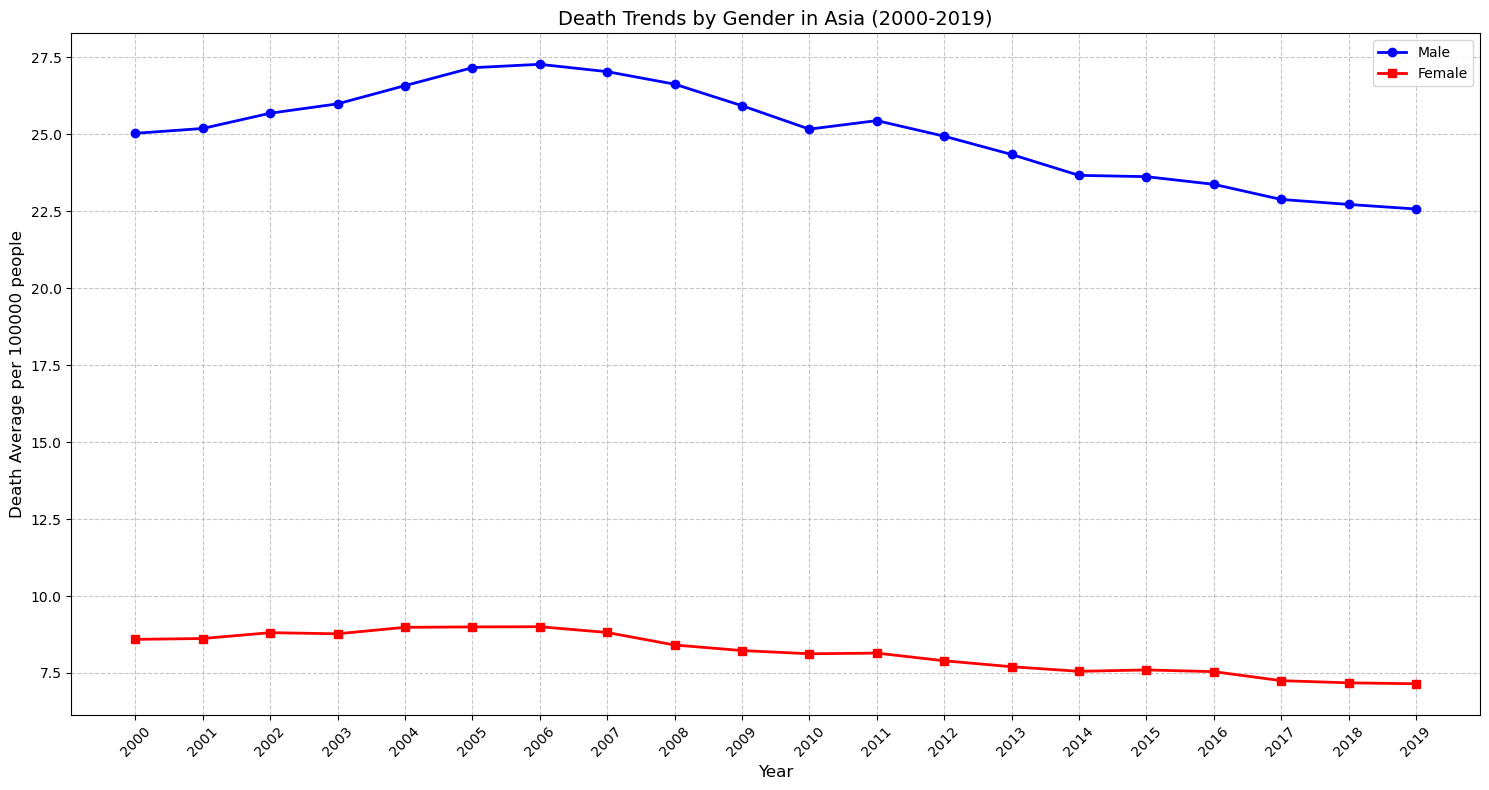

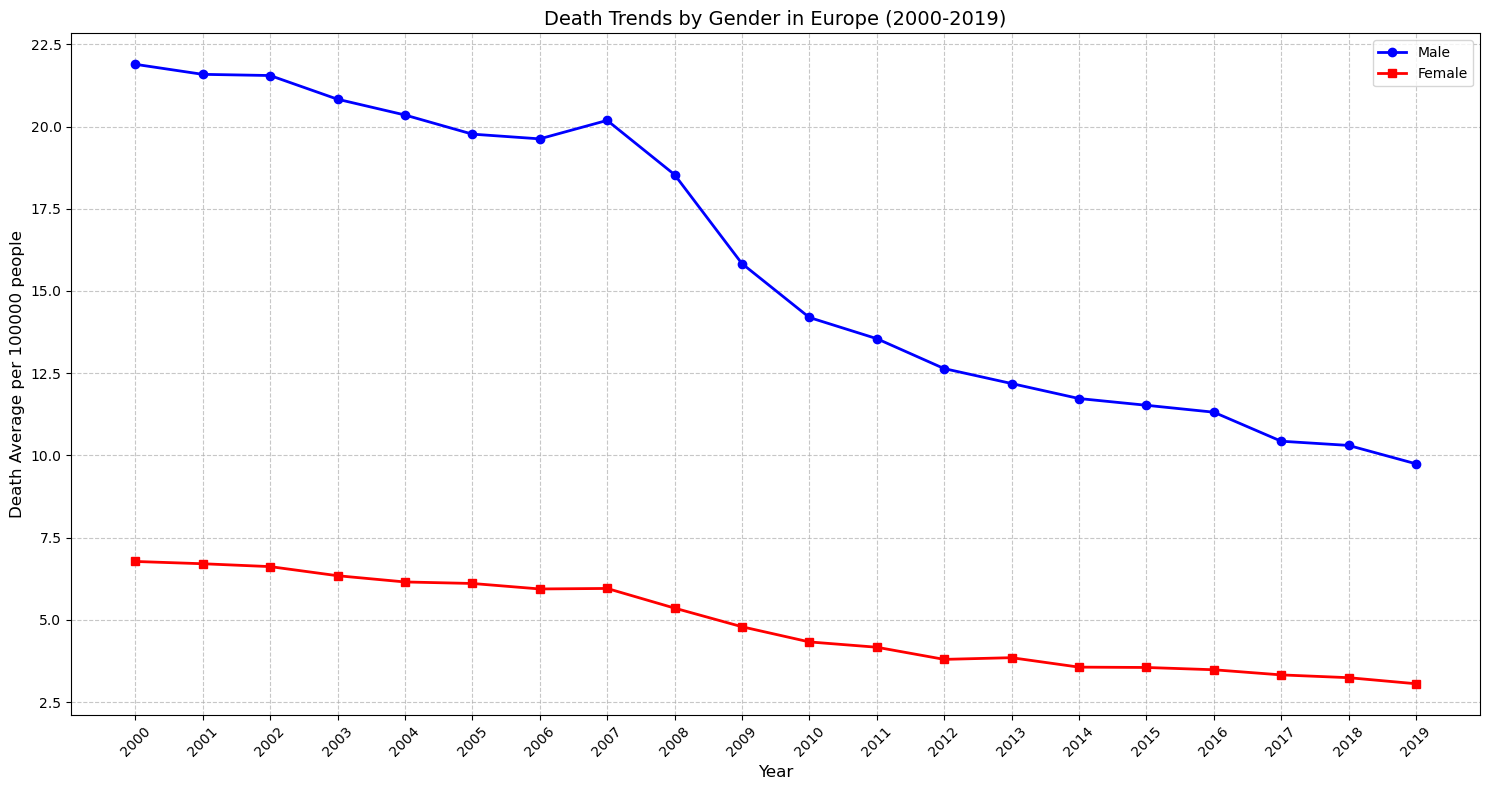

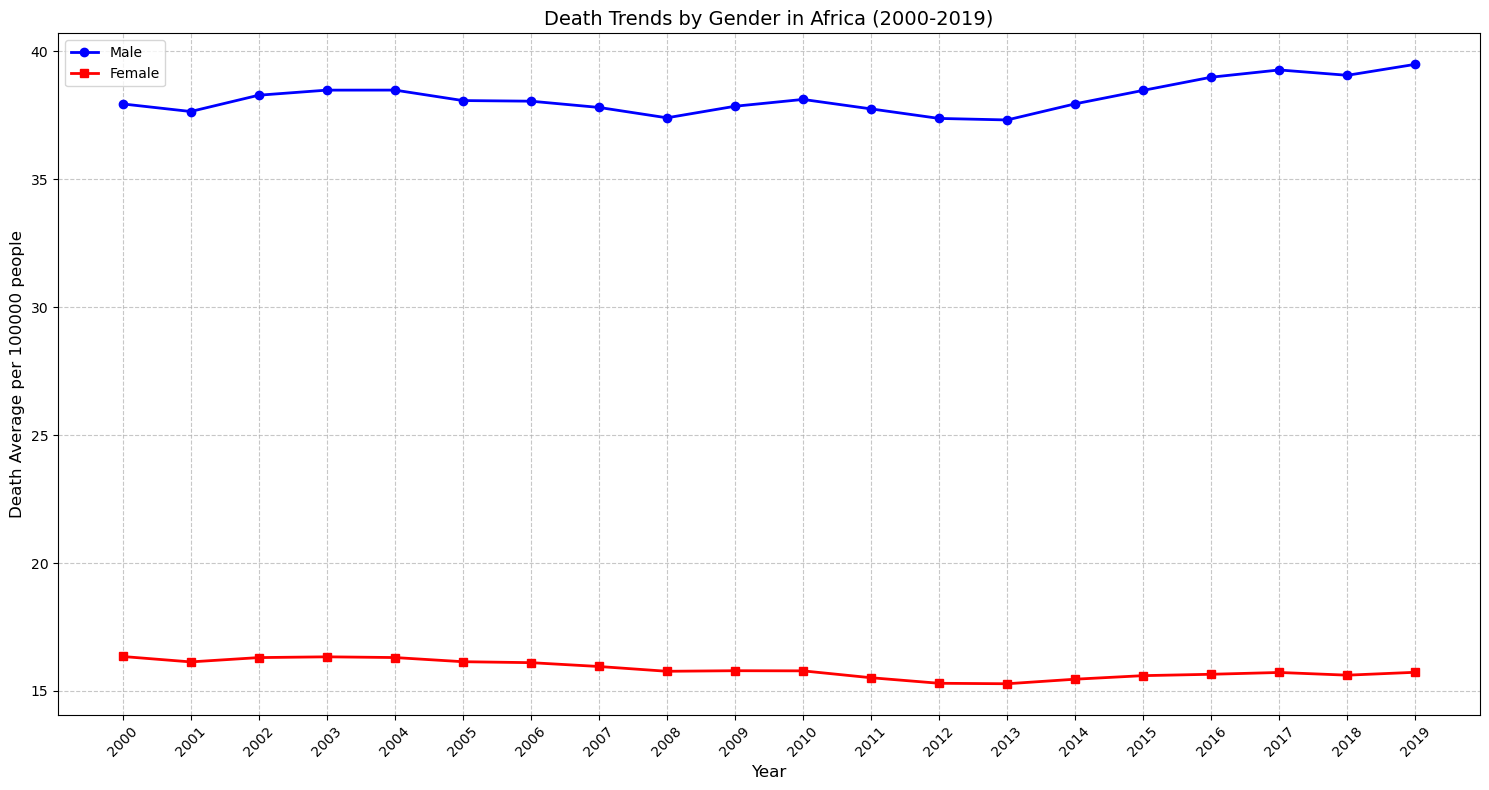

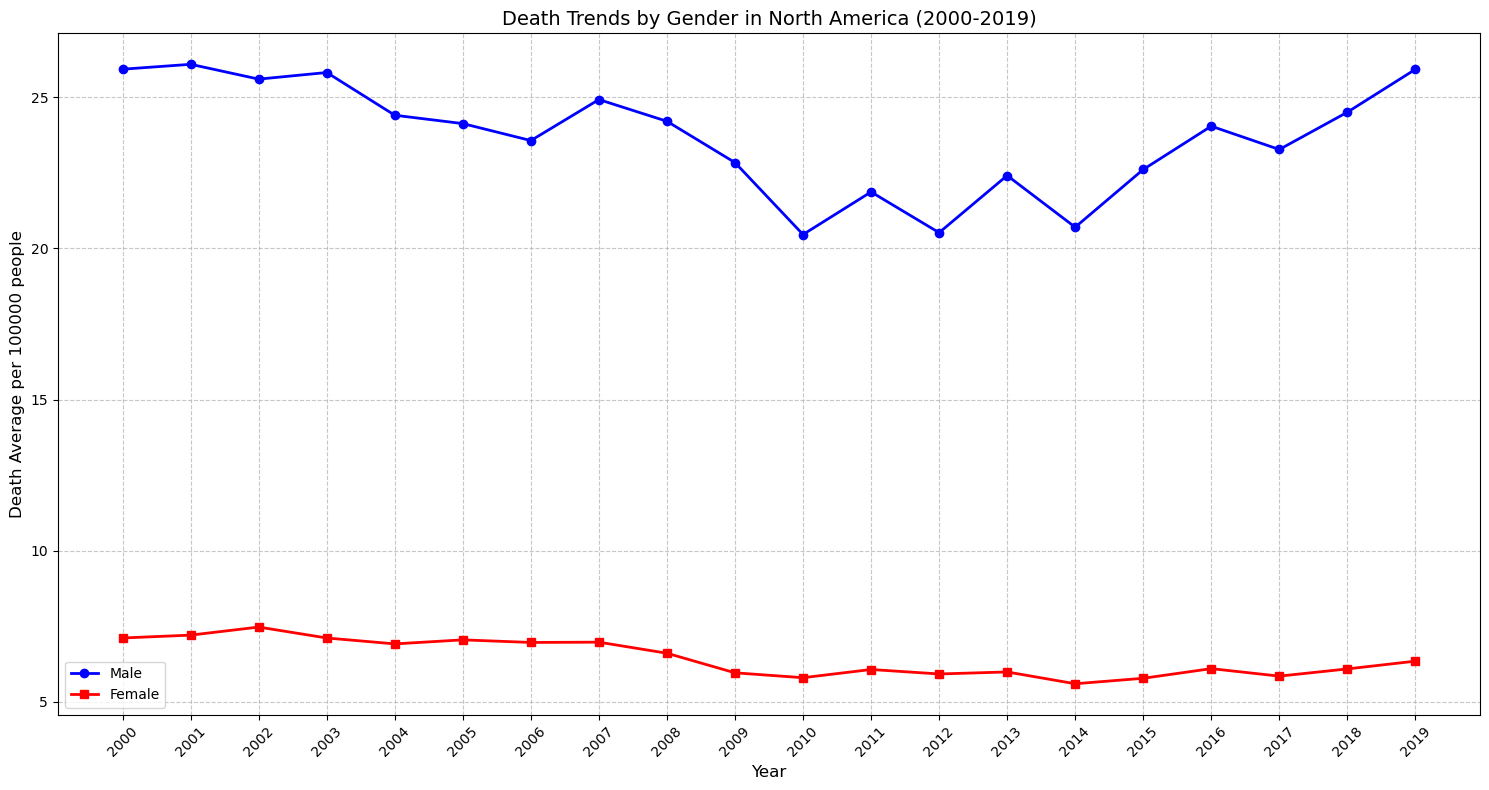

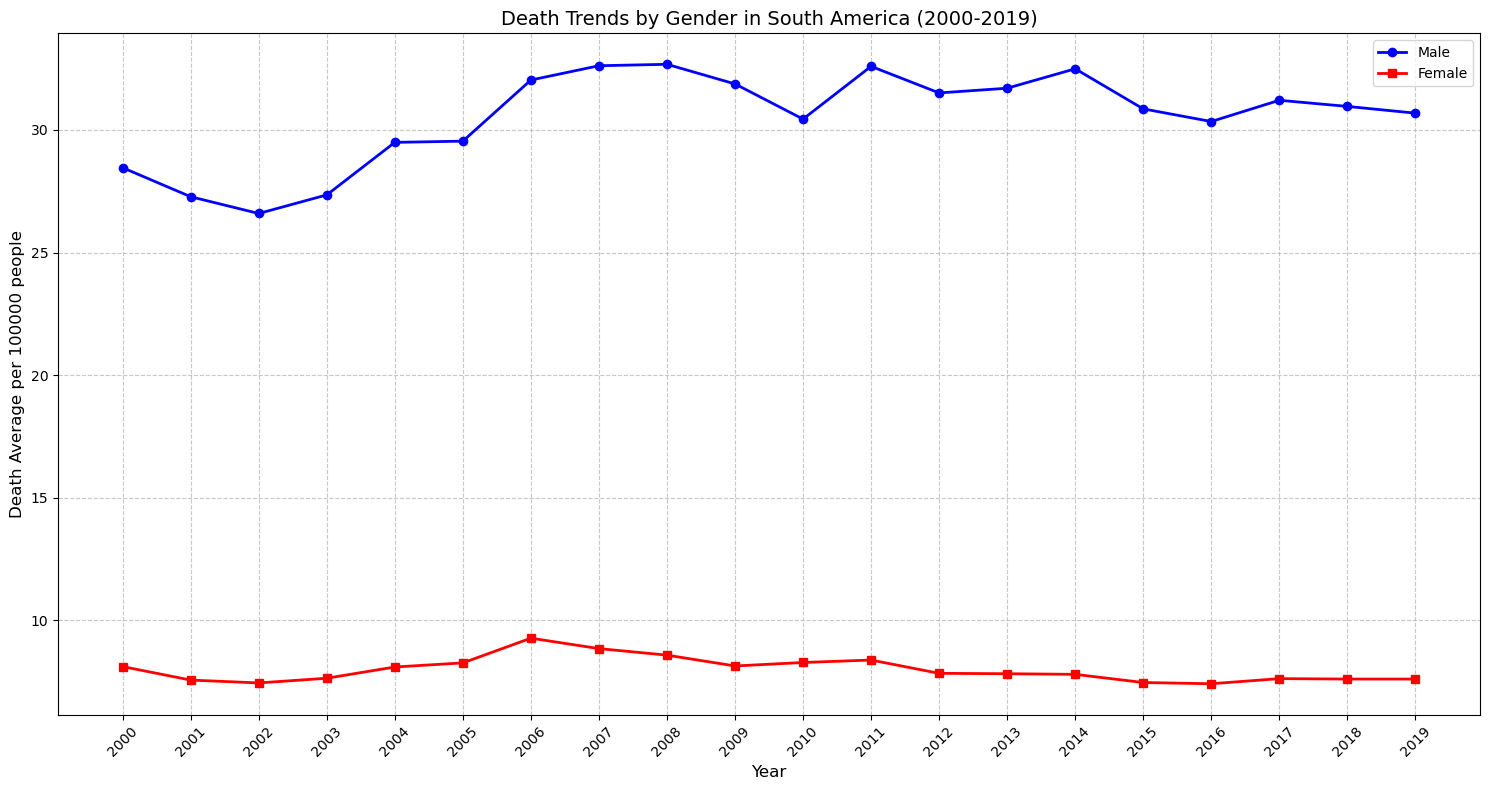

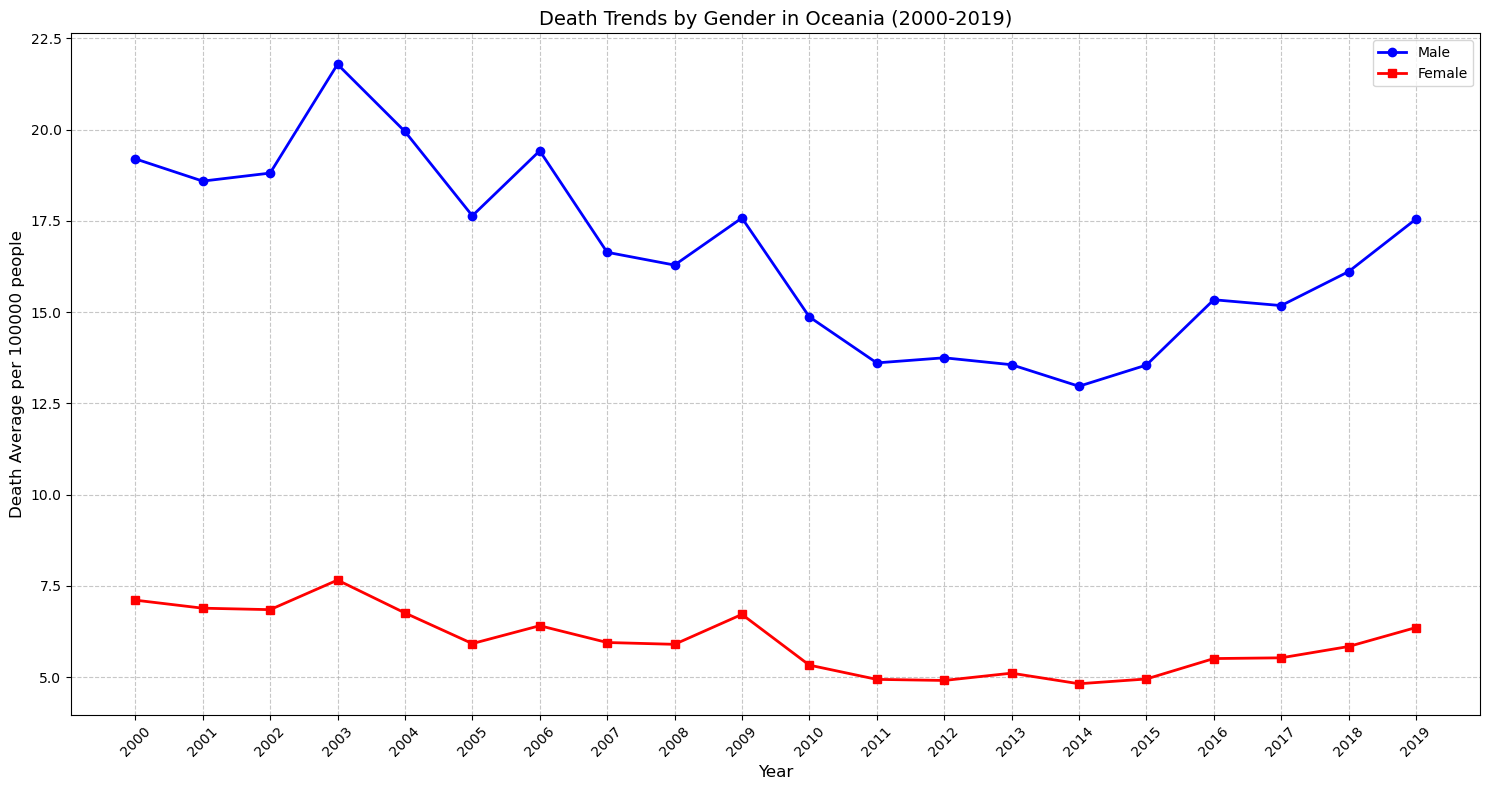

In [17]:
CONTINENTS = df.iloc[:, -1].unique()

for continent in CONTINENTS:
    plot_death_trends_by_gender(continent=continent)

### **Scatter plot theo hai giới tính, theo từng năm, trên mỗi châu lục**

In [18]:
# Extract original df to 3 smaller dfs: male, female and both sexes 
df_male = df.loc[:, [df.columns[0]] + [col for col in df.columns if col[1] == 'Male'] + [df.columns[-1]]]
df_female = df.loc[:, [df.columns[0]] + [col for col in df.columns if col[1] == 'Female'] + [df.columns[-1]]]
df_both_sexes = df.loc[:, [df.columns[0]] + [col for col in df.columns if col[1] == 'Both sexes'] + [df.columns[-1]]]

# Change columns' names
df_male.columns = [df_male.columns[0][1]] + [col[0] for col in df_male.columns[1:-1]] + [df_male.columns[-1][1]]
df_female.columns = [df_female.columns[0][1]] + [col[0] for col in df_female.columns[1:-1]] + [df_female.columns[-1][1]]
df_both_sexes.columns = [df_both_sexes.columns[0][1]] + [col[0] for col in df_both_sexes.columns[1:-1]] + [df_both_sexes.columns[-1][1]]

In [19]:
def draw_continent_categorical_scatter(continent, data=df_both_sexes):
    """
    Draw a categorical scatter plot for all countries in a specific continent.
    X-axis is the year (2000-2019), Y-axis shows deaths per country with the mean line.
    
    Parameters:
    -----------
    continent : str
        Name of the continent to plot
    data : DataFrame
        DataFrame containing the data, default is df_both_sexes
    """
    # Filter data for the specified continent
    continent_data = data[data['Continent'] == continent]
    
    # Get all year columns
    year_columns = [str(year) for year in range(2000, 2020)]
    
    plt.figure(figsize=(15, 8))
    
    # For storing mean values
    mean_values = []
    
    # For each year, plot all countries as scatter points
    for i, year in enumerate(year_columns):
        # Get all country values for this year
        values = continent_data[year]
        
        # Calculate the mean
        mean_val = values.mean()
        mean_values.append(mean_val)
        
        # Plot scatter points for each country in this year
        plt.scatter([i] * len(values), values, alpha=0.6, color='blue')
    
    # Plot the mean line
    plt.plot(range(len(year_columns)), mean_values, 'r-', linewidth=2, label='Mean')
    
    # Set labels and title
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Deaths per 100,000 population', fontsize=12)
    plt.title(f'Death Rates for All Countries in {continent} (2000-2019)', fontsize=14)
    
    # Set x-ticks as years
    plt.xticks(range(len(year_columns)), year_columns, rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

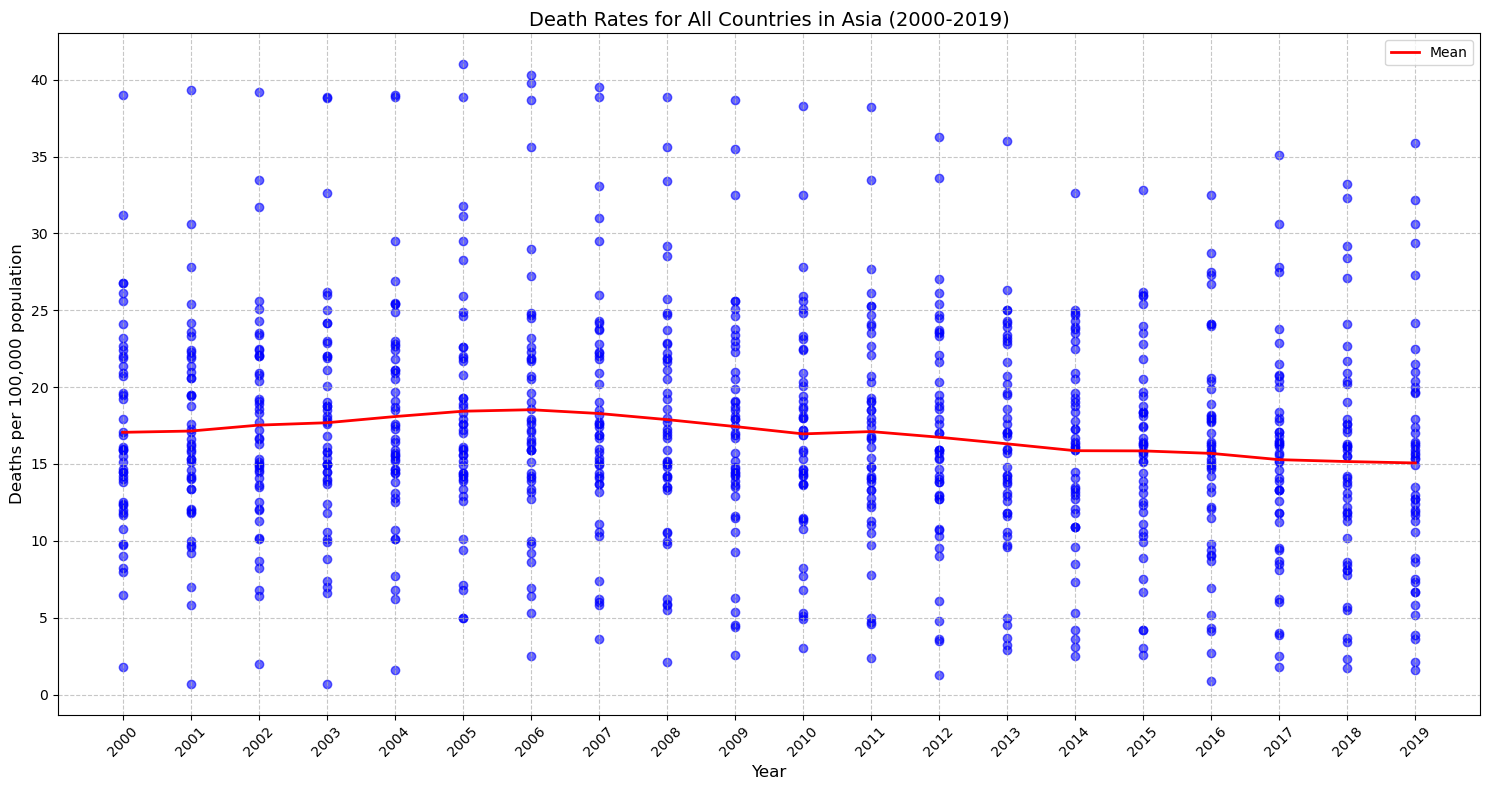

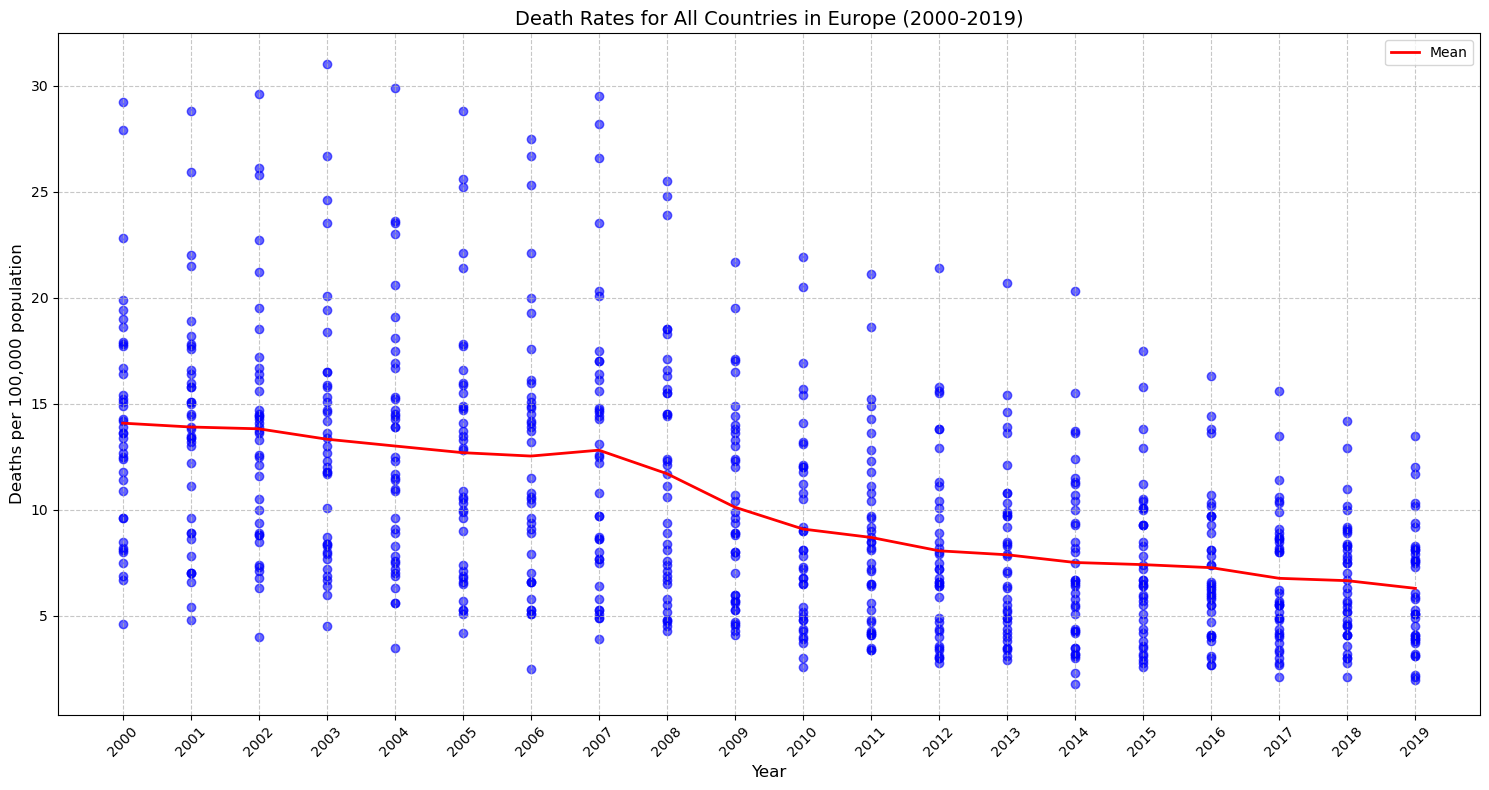

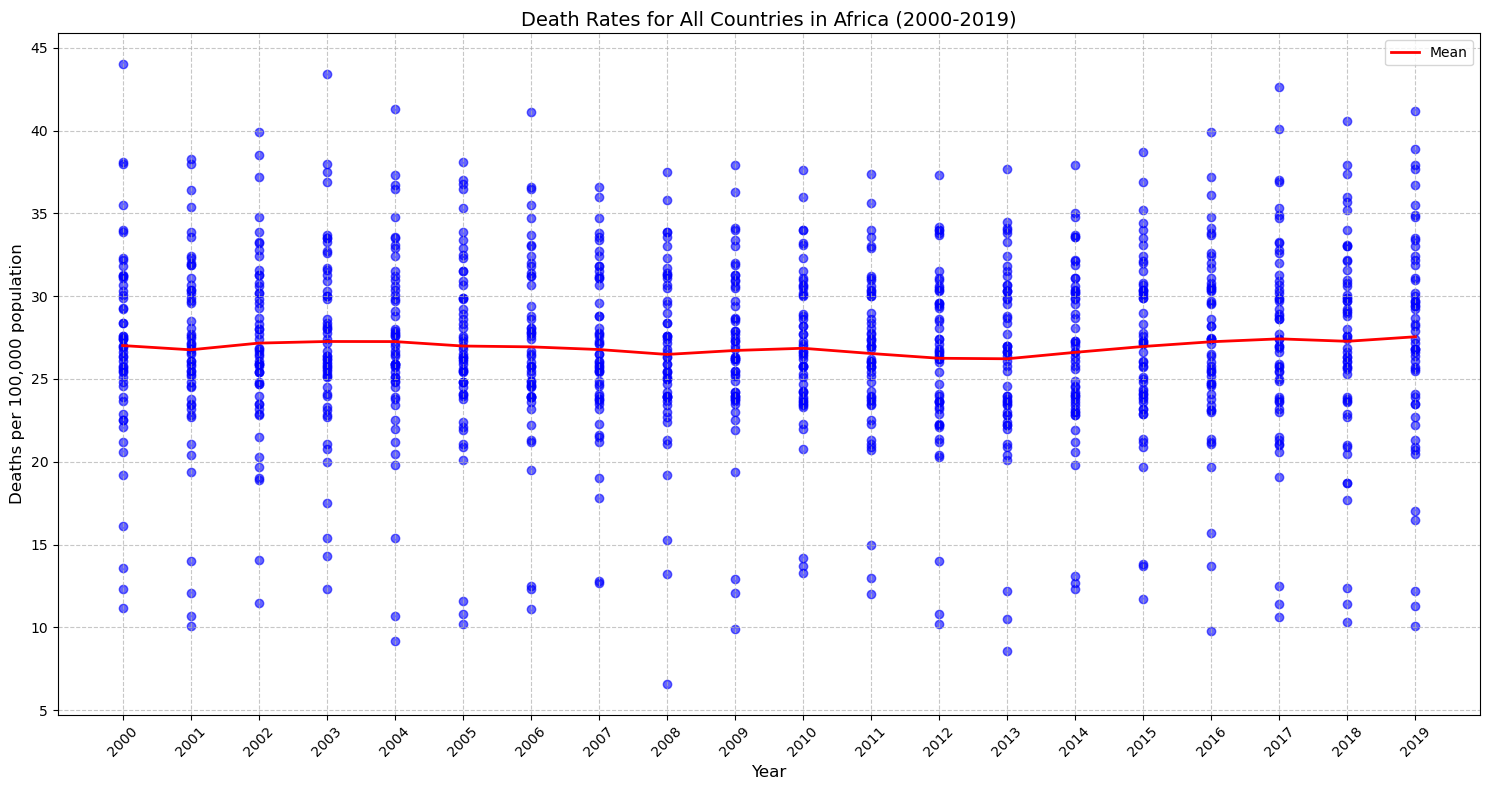

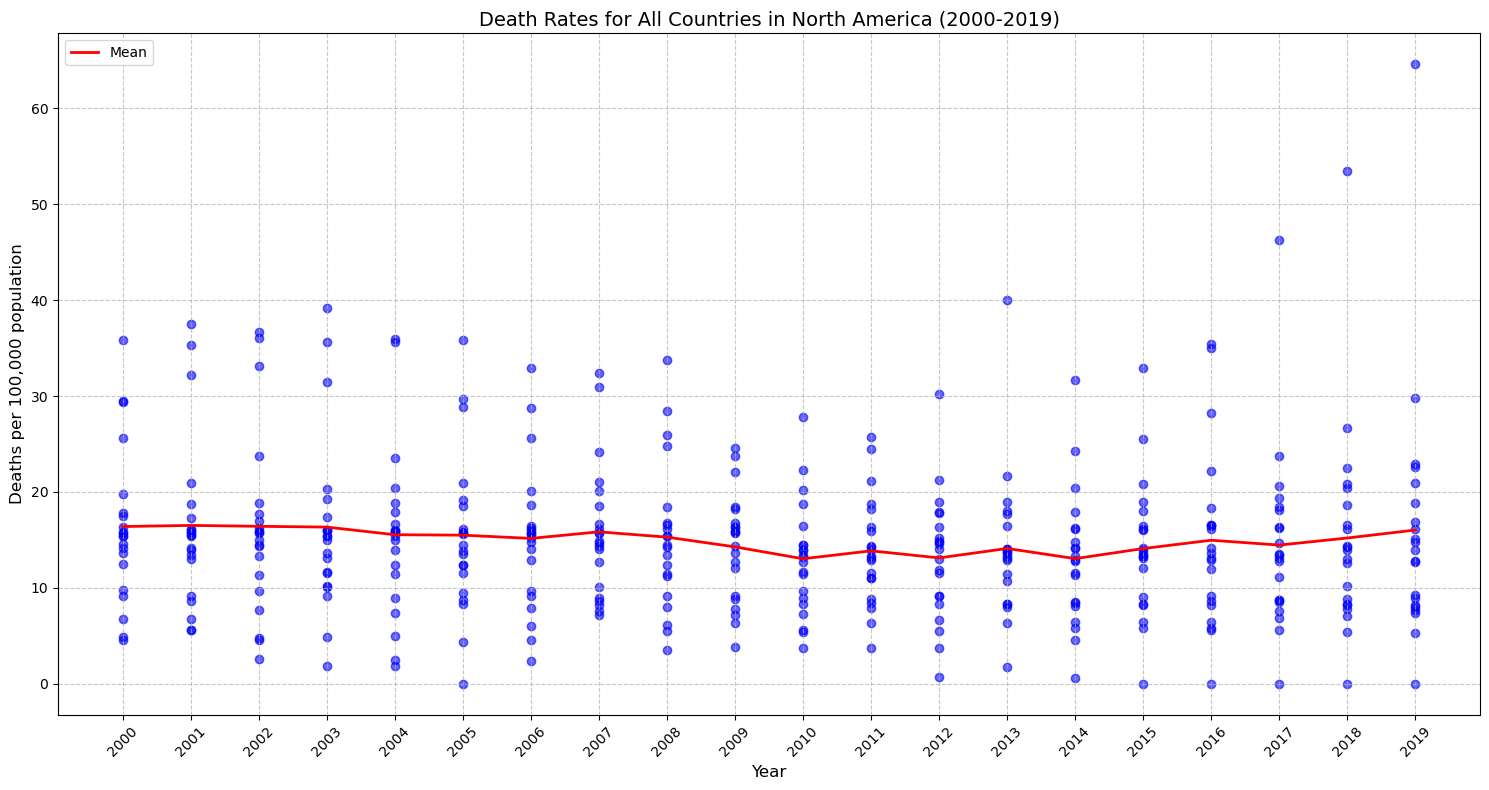

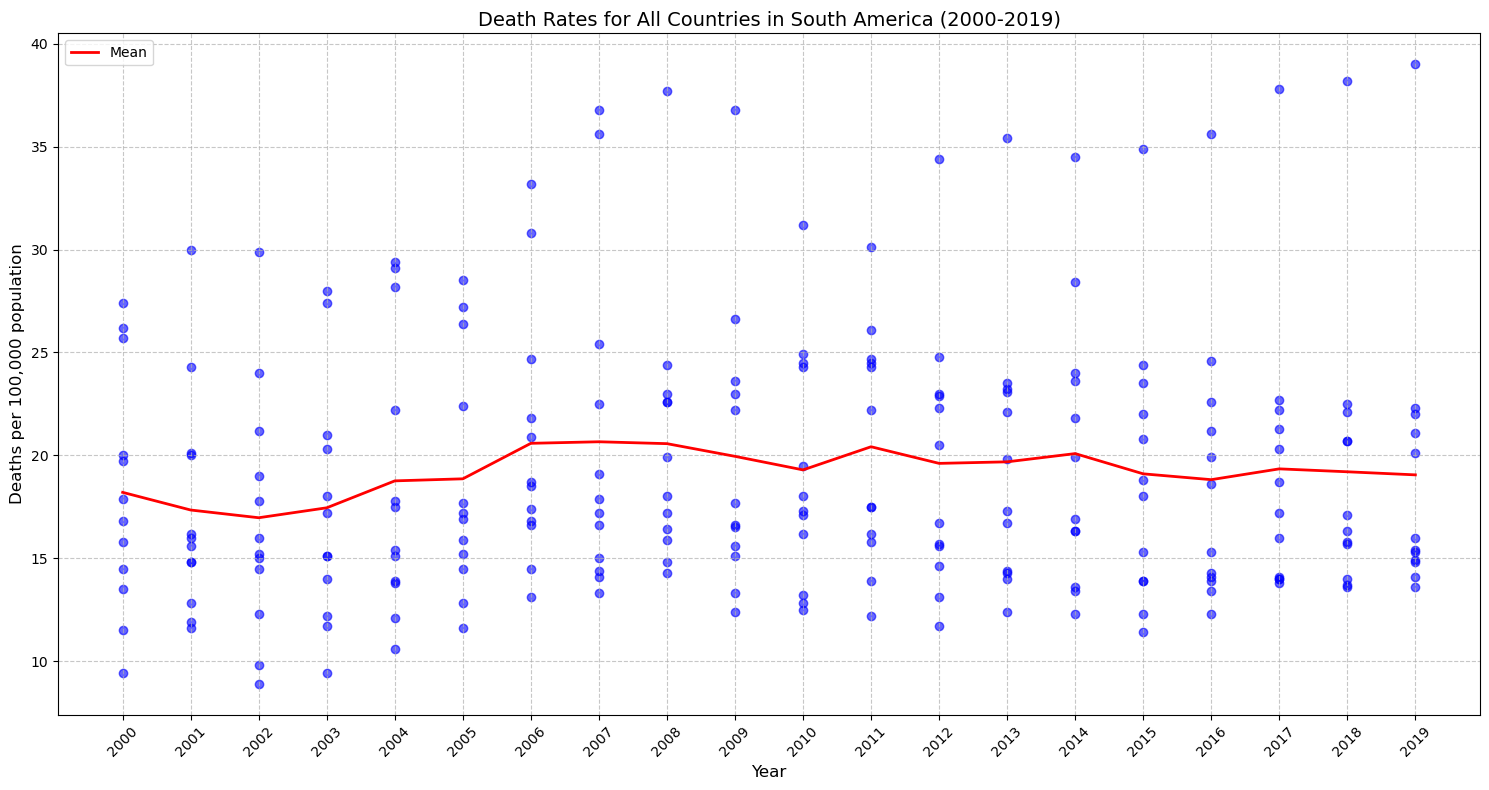

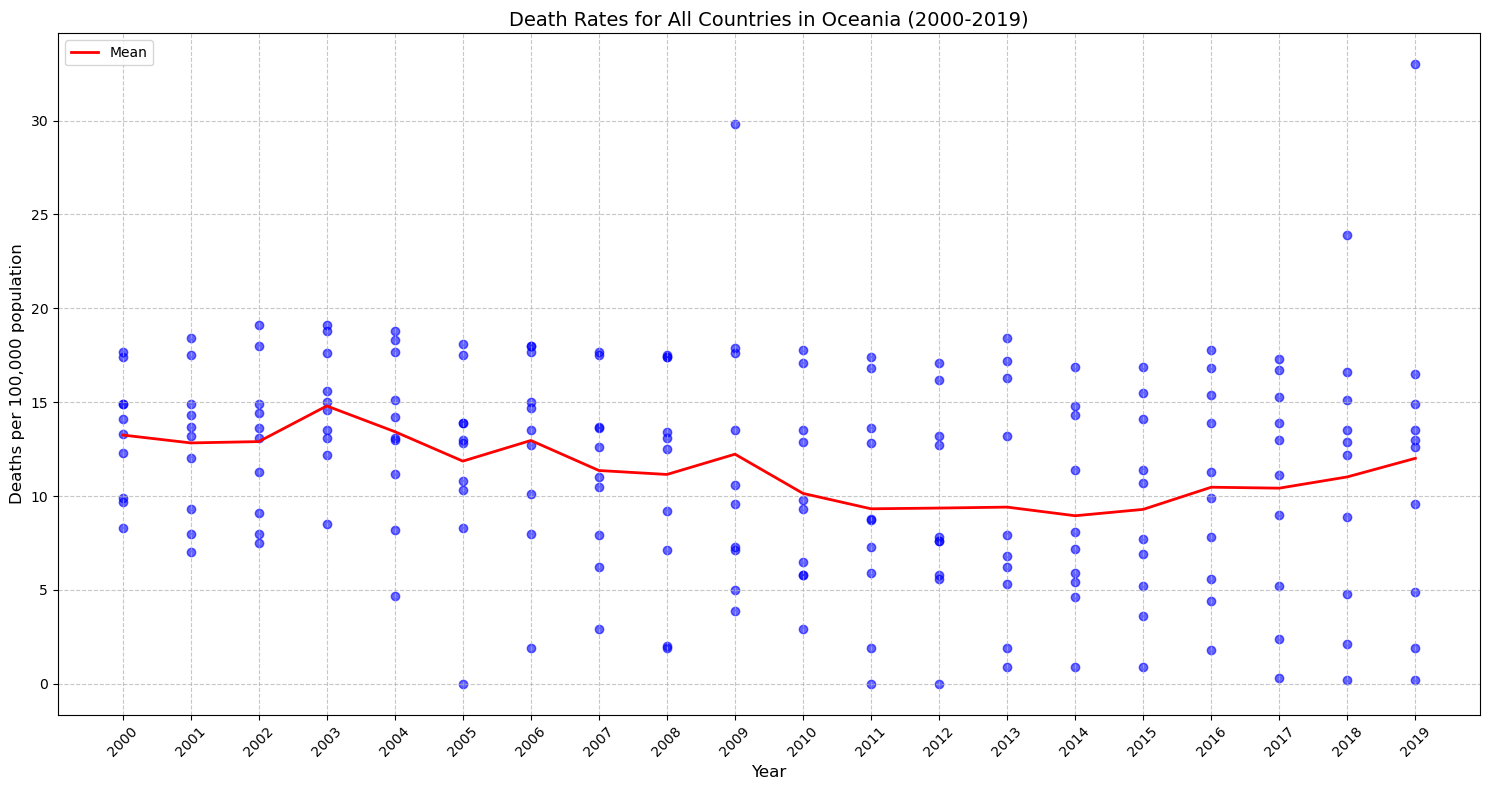

In [20]:
for continent in CONTINENTS:
    draw_continent_categorical_scatter(continent=continent)